In [2]:
# Loading the important libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Loading the dataset
insurance = pd.read_csv("E:/Data Scientist/Datasets/insurance.csv")
print(insurance.head())
print("\n")
print(insurance.tail(10))


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


      age     sex     bmi  children smoker     region      charges
1328   23  female  24.225         2     no  northeast  22395.74424
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16560
1331   23  female  33.400         0     no  southwest  10795.93733
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  

In [4]:
# Primary summary statistics
print(insurance.describe())
print("\n")
print(insurance.info())
print("\n")
print(insurance.isnull().sum())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


age         0
sex         0
bmi         0
children    0
smok


#### As there is not missing data in the dataframe from these primary statistics analysis, from the describe method we can see there is categorical variables in the data frame. But when it comes to the analysis of the multiple linear regression we have convert these categorical into numerical variables. The model can accept only the numerical variables. The only to do this is by Label encoding. 

In [5]:
# Import label encoding
from sklearn.preprocessing import LabelEncoder
# Inititate the label encoding
label = LabelEncoder()

In [6]:
# Iterate over all the columns where the dtyp is object 
for col in insurance.columns:
    if insurance[col].dtype== 'object':
        insurance[col] = label.fit_transform(insurance[col])

In [7]:
# Check the dataframe now for confirmation
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int32
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int32
region      1338 non-null int32
charges     1338 non-null float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


#### As we can see the categorical columns in dataframe have changed to numerical variables.Next step is that we have to split the data into train and test. Before we split the data, we check for the muticollinear problem between two independent variables then we go ahead with the spliting of data

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000




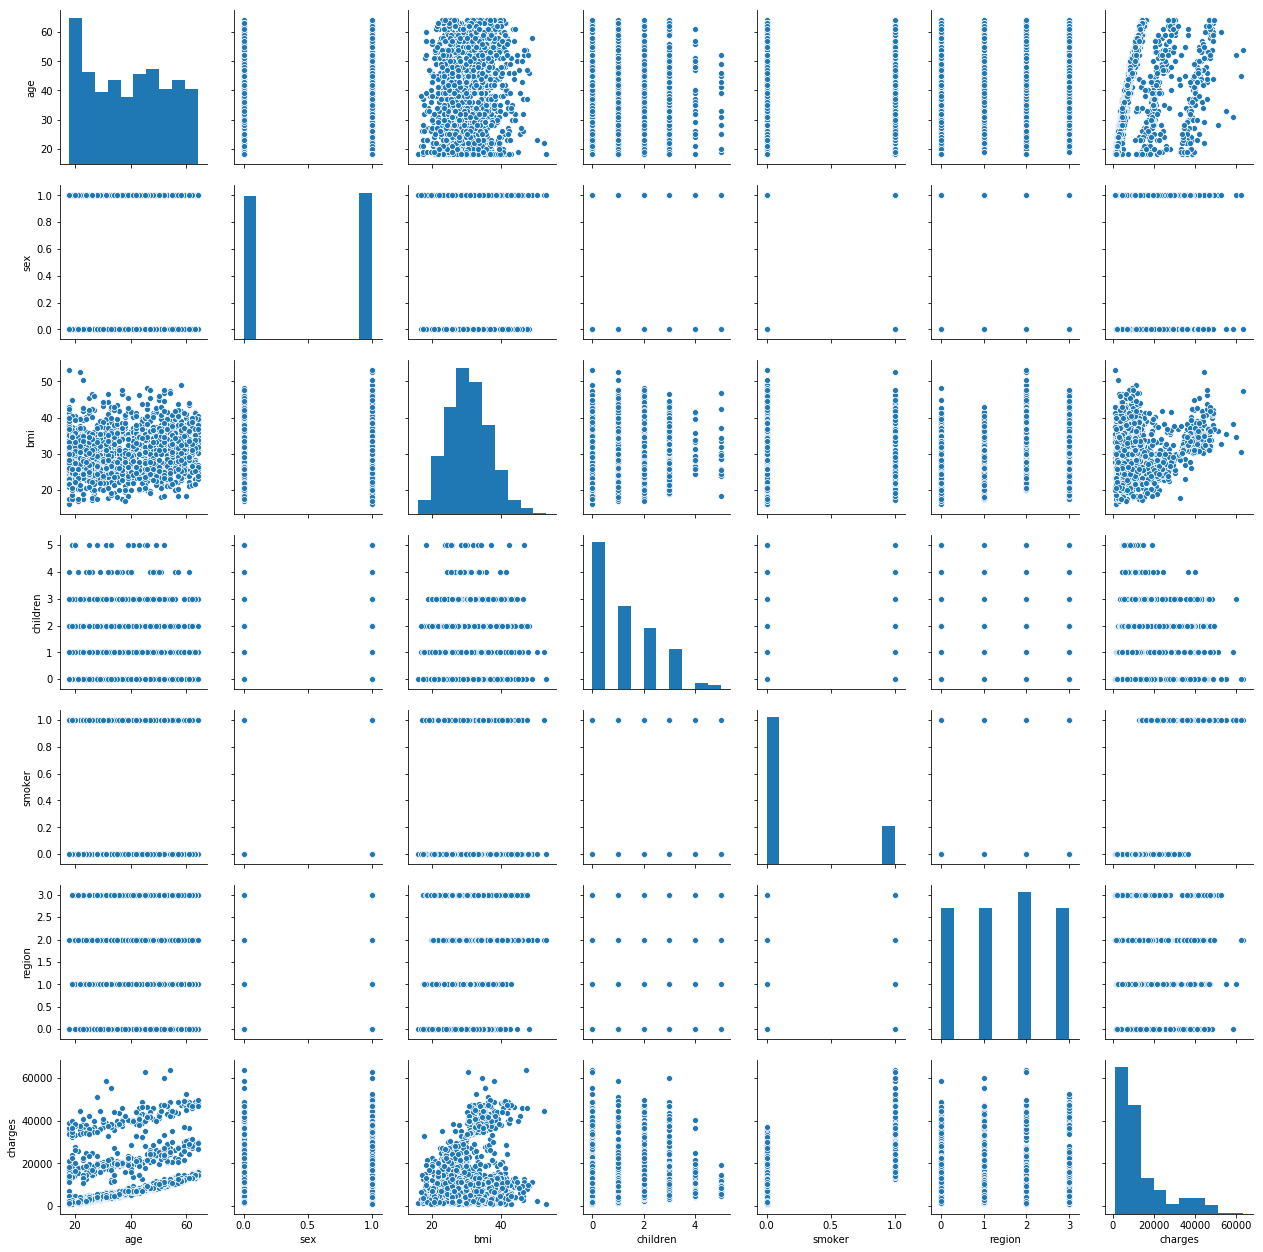

In [8]:
# Printing the correlation table and plotting the variables using seabron
print(insurance.corr())
print("\n")
sns.pairplot(insurance.iloc[:,:])

In [9]:
# As we can see there is no collinear between two independent variables in this plot
# Now we separate the dataset into two parts independent variables and dependent variables
insurance.columns
X_values = insurance.iloc[:,0:6]
Y_values = insurance.iloc[:,6]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split( X_values,Y_values,test_size = 0.3) 
print("X-training set:",X_train.shape)
print("\n")
print("X-test set:",X_test.shape)
print("\n")
print("Y-training set:",Y_train.shape)
print("\n")
print("Y-testing set:", Y_test.shape)

X-training set: (936, 6)


X-test set: (402, 6)


Y-training set: (936,)


Y-testing set: (402,)


In [12]:
# Now load the linear_regression model from sklearn 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
model = linear.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [13]:
# Now we have trained the model and predict the values but we have to evaluate model where we check with the r-squared method
# Check for the Mean Square error 
from sklearn.metrics import mean_squared_error
error = mean_squared_error(Y_pred,Y_test)
r_square = linear.score(X_test,Y_test)
print("Mean Square Error:",error)
print("R-Sqaure Value:",r_square)

Mean Square Error: 36995601.978
R-Sqaure Value: 0.753741409034


#### The R_square value is 75.37% which says the predicted model fit good but still we can improvement the performance where we can remove variables which are insignificant. This method is called Back elimination

In [14]:
# Import statsmodels for Ordinary least square method
import statsmodels.formula.api as smf 
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
model1 = smf.ols('charges~ age + sex + bmi + children + smoker + region',data = insurance).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        19:45:23   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.182e+04    955.130    -12.371      0.000   -1.37e+04   -9941.729
age          257.2881     11.886     21.647      0.000     233.971     280.605
sex         -131.1106    332.811     -0.394      0.694    -784.001     521.780
bmi          332.5701     27.722     11.997      0.000     278.186     386.954
children     479.3694    137.644      3.483      0.001     209.346     749.393
smoker      2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
region      -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model2 = smf.ols('charges~ sex',data = insurance).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.400
Date:                Wed, 08 May 2019   Prob (F-statistic):             0.0361
Time:                        19:45:37   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.257e+04    470.072     26.740      0.000    1.16e+04    1.35e+04
sex         1387.1723    661.331      2.098      0.036      89.812    2684.532
==============================================================================
Omnibus:                      331.451   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.534
Skew:                           1.496   Prob(JB):                    6.00e-139
Kurtosis:                       4.572   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model3 = smf.ols('charges ~ region',data = insurance).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05149
Date:                Wed, 08 May 2019   Prob (F-statistic):              0.821
Time:                        19:45:43   Log-Likelihood:                -14478.
No. Observations:                1338   AIC:                         2.896e+04
Df Residuals:                    1336   BIC:                         2.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.337e+04    562.359     23.781      0.000    1.23e+04    1.45e+04
region       -68.0449    299.858     -0.227      0.821    -656.289     520.199
==============================================================================
Omnibus:                      337.427   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              655.098
Skew:                           1.516   Prob(JB):                    5.59e-143
Kurtosis:                       4.600   Cond. No.                         3.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model4 = smf.ols('charges ~ sex + region', data = insurance).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.226
Date:                Wed, 08 May 2019   Prob (F-statistic):              0.108
Time:                        19:45:47   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.896e+04
Df Residuals:                    1335   BIC:                         2.897e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.268e+04    652.517     19.427      0.000    1.14e+04     1.4e+04
sex         1387.8913    661.572      2.098      0.036      90.058    2685.724
region       -70.9277    299.480     -0.237      0.813    -658.431     516.576
==============================================================================
Omnibus:                      331.995   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.355
Skew:                           1.497   Prob(JB):                    2.41e-139
Kurtosis:                       4.577   Cond. No.                         5.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

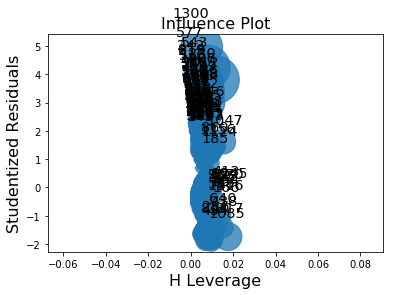

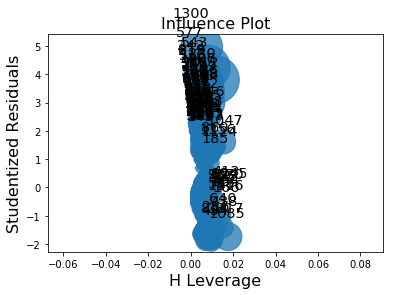

In [19]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [20]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
rsq_age = smf.ols('age ~ sex + bmi + children + smoker + region + charges',data = insurance).fit().rsquared
vif_age = 1/(1-rsq_age)
vif_age

1.3728662728828234

In [22]:
rsq_sex = smf.ols('sex ~ age + bmi + children + smoker + region + charges',data = insurance).fit().rsquared
vif_sex = 1/(1-rsq_sex)
vif_sex

1.0090062858894659

In [23]:
rsq_bmi = smf.ols('bmi ~ sex + age + children + smoker + region + charges',data = insurance).fit().rsquared
vif_bmi = 1/(1-rsq_bmi)
vif_bmi

1.1531260964686101

In [24]:
rsq_children = smf.ols('children ~ sex + bmi + age + smoker + region + charges',data = insurance).fit().rsquared
vif_children = 1/(1-rsq_children)
vif_children

1.0116174503362703

In [25]:
rsq_smoker = smf.ols('smoker ~ sex + bmi + children + age + region + charges',data = insurance).fit().rsquared
vif_smoker = 1/(1-rsq_smoker)
vif_smoker

3.5360990670016585

In [26]:
rsq_region = smf.ols('region ~ sex + bmi + children + smoker + age + charges',data = insurance).fit().rsquared
vif_region = 1/(1-rsq_region)
vif_region

1.0301429540491771

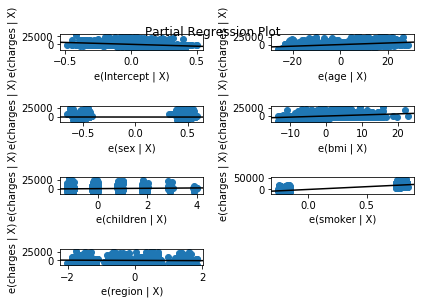

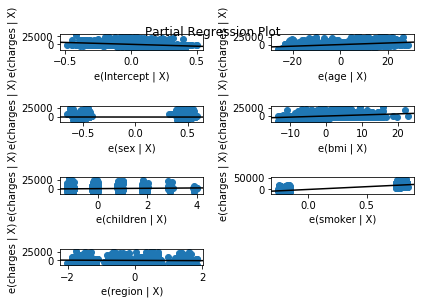

In [27]:
sm.graphics.plot_partregress_grid(model1)

In [28]:
final_model = smf.ols('charges ~ age + bmi + children + smoker',data = insurance).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        19:47:05   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
age          257.8495     11.896     21.675      0.000     234.512     281.187
bmi          321.8514     27.378     11.756      0.000     268.143     375.559
children     473.5023    137.792      3.436      0.001     203.190     743.814
smoker      2.381e+04    411.220     57.904      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# From the above analysis "sex" and "region" are getting p-value > 0.05 when they are considered individually and together.
# Removing these values made the p-value in the correct limit